=== HASIL EVALUASI: CatBoost ===
Akurasi  : 0.9997
Presisi  : 0.8993
Recall   : 0.9516 (Kritikal untuk Deteksi Ancaman)
F1-Score : 0.9247

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    187308
           1       0.90      0.95      0.92       413

    accuracy                           1.00    187721
   macro avg       0.95      0.98      0.96    187721
weighted avg       1.00      1.00      1.00    187721



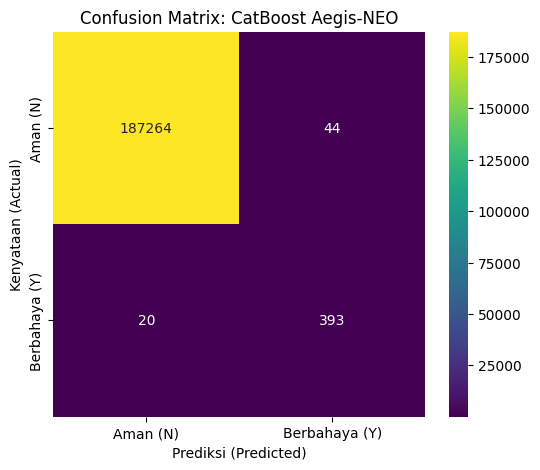

=== HASIL EVALUASI: XGBoost ===
Akurasi  : 0.9998
Presisi  : 0.9550
Recall   : 0.9758 (Kritikal untuk Deteksi Ancaman)
F1-Score : 0.9653

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    187308
           1       0.95      0.98      0.97       413

    accuracy                           1.00    187721
   macro avg       0.98      0.99      0.98    187721
weighted avg       1.00      1.00      1.00    187721



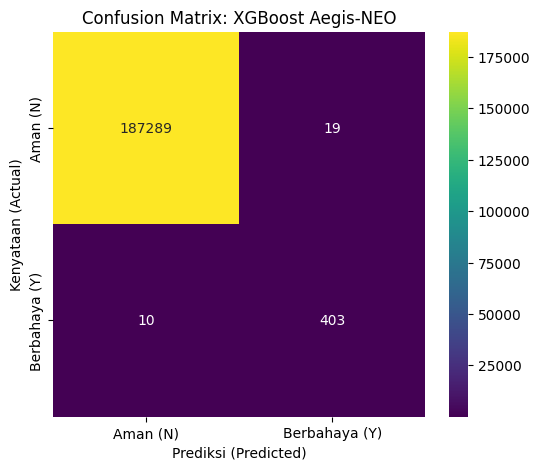

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# 1. Load Data Test dan Model
data_dir = '../data/processed'
model_dir = '../models'

X_test = np.load(f"{data_dir}/X_test.npy")
y_test = np.load(f"{data_dir}/y_test.npy")

# Load Models
cb_model = CatBoostClassifier()
cb_model.load_model(f"{model_dir}/catboost_model.cbm")
xgb_model = joblib.load(f"{model_dir}/xgboost_model.pkl")

# 2. Fungsi Evaluasi yang Diperbaiki
def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Menghitung Confusion Matrix agar tidak NameError
    cm = confusion_matrix(y_test, y_pred)
    
    # Menghitung Metrik Utama [cite: 653]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"=== HASIL EVALUASI: {name} ===")
    print(f"Akurasi  : {acc:.4f}")
    print(f"Presisi  : {prec:.4f}")
    print(f"Recall   : {rec:.4f} ")
    print(f"F1-Score : {f1:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    
    return y_pred, cm

# 3. Fungsi Plotting Confusion Matrix
def plot_cm(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
                xticklabels=['Aman (N)', 'Berbahaya (Y)'], 
                yticklabels=['Aman (N)', 'Berbahaya (Y)'])
    plt.title(f'Confusion Matrix: {title}')
    plt.ylabel('Kenyataan (Actual)')
    plt.xlabel('Prediksi (Predicted)')
    plt.show()

# --- EKSEKUSI EVALUASI ---

# Evaluasi CatBoost
y_pred_cb, cm_cb = evaluate_model(cb_model, "CatBoost", X_test, y_test)
plot_cm(cm_cb, "CatBoost Aegis-NEO")

# Evaluasi XGBoost
y_pred_xgb, cm_xgb = evaluate_model(xgb_model, "XGBoost", X_test, y_test)
plot_cm(cm_xgb, "XGBoost Aegis-NEO")